# 使用示例

### 一、引入依赖的包
- 需要安装baostock、pandas、ta-lib等

In [137]:
from bs_agent import bsAgent
from strategy import *
from indicator import *
import matplotlib.pyplot as plt
import baostock as bs
import backtrader as bt
import backtrader.feeds as btfeeds
import pandas as pd
import math
import datetime
from backtrader.indicators import EMA
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16.0, 4.0)

### 二、拉取股票数据
- 可以选择拉取k线数据的 股票代码、起止时间、时间周期 等
- 重放策略可以选择 Indicator.MACD_X、Indicator.KDJ_X 等

In [142]:
bs_a=bsAgent(stack_code='000001.sh',start_date='2019-01-01', end_date='2020-09-01',freq='d')
# bs_a.replay(Indicator.KDJ_X,start_date='2020-05-01', end_date='2020-10-13',view='true')
# bs_a.plot(Indicator.KDJ_X)

login success!


Starting Portfolio Value: 100000.00
2019-06-21, Close, 3001.98
2019-06-24, Close, 3008.15
2019-06-25, Close, 2982.07
2019-06-26, Close, 2976.28
2019-06-27, Close, 2996.79
2019-06-28, Close, 2978.88
2019-07-01, Close, 3044.90
2019-07-02, Close, 3043.94
2019-07-03, Close, 3015.26
2019-07-04, Close, 3005.25
2019-07-05, Close, 3011.06
2019-07-08, Close, 2933.36
2019-07-09, Close, 2928.23
2019-07-10, Close, 2915.30
2019-07-11, Close, 2917.76
2019-07-12, Close, 2930.55
2019-07-15, Close, 2942.18
2019-07-16, BUY EXECUTED, Price: 2938.64, Cost: 2938.64, Comm 5.00
2019-07-16, Close, 2937.62
2019-07-17, Close, 2931.69
2019-07-18, Close, 2901.18
2019-07-19, Close, 2924.20
2019-07-19, K, 39.05
2019-07-19, J, 51.54
2019-07-19, D, 32.80
2019-07-19, SELL CREATE, 2924.20
2019-07-22, SELL EXECUTED, Price: 2925.79, Cost: 2938.64, Comm 4.97
2019-07-22, OPERATION PROFIT, GROSS -12.85, NET -22.82
2019-07-22, Close, 2886.97
2019-07-23, Close, 2899.94
2019-07-24, Close, 2923.28
2019-07-25, BUY EXECUTED, Pric

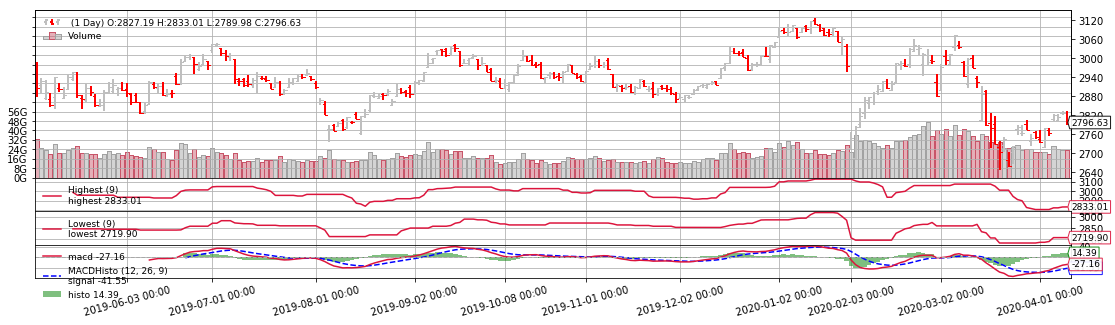

[[<matplotlib.figure.Figure at 0x137db8f28>]]

In [143]:
# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)
            
# Add a Stratey
cerebro.addstrategy(KDJMACDStrategy)

# Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname=bs_a.k_data,
                           fromdate=datetime.datetime(2019, 5, 1),
                           todate=datetime.datetime(2020, 4, 12),)

cerebro.adddata(data)

cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(0.0017)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run over everything
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
return_all = cerebro.broker.getvalue()/100000.0
print('Total ROI: {0}%, Annual ROI{1}%'.format(
                             round((return_all - 1.0) * 100, 2),
                             round((pow(return_all, 1.0 / 10) - 1.0) * 100, 2)
                             ))

# Plot the result
cerebro.plot(style='bar')

### 三、查看数据

In [145]:
bs_a.k_data

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
date,,,,,,,,,,,,,,,,,
2019-01-02,sh.000001,2497.8800,2500.2780,2456.4230,2465.2910,2493.8960,1.099320e+10,97592573952.0000,3,0.328717,1,-1.147000,0.000000,0.000000,0.000000,0.000000,0
2019-01-03,sh.000001,2461.7820,2488.4790,2455.9250,2464.3620,2465.2910,1.243975e+10,106922790912.0000,3,0.371963,1,-0.037700,0.000000,0.000000,0.000000,0.000000,0
2019-01-04,sh.000001,2446.0190,2515.3160,2440.9060,2514.8680,2464.3620,1.688777e+10,139298676736.0000,3,0.504935,1,2.049400,0.000000,0.000000,0.000000,0.000000,0
2019-01-07,sh.000001,2528.6980,2536.9770,2515.5080,2533.0880,2514.8680,1.773050e+10,145513242624.0000,3,0.530082,1,0.724500,0.000000,0.000000,0.000000,0.000000,0
2019-01-08,sh.000001,2530.3000,2531.3450,2520.1640,2526.4620,2533.0880,1.580992e+10,123379040256.0000,3,0.472663,1,-0.261600,0.000000,0.000000,0.000000,0.000000,0
2019-01-09,sh.000001,2536.4170,2574.4070,2536.1570,2544.3440,2526.4620,1.918879e+10,160812527616.0000,3,0.573680,1,0.707800,0.000000,0.000000,0.000000,0.000000,0
2019-01-10,sh.000001,2543.8530,2551.8250,2531.6630,2535.0980,2544.3440,1.598743e+10,132692332544.0000,3,0.477903,1,-0.363400,0.000000,0.000000,0.000000,0.000000,0
2019-01-11,sh.000001,2539.5480,2554.7860,2533.3580,2553.8310,2535.0980,1.494441e+10,122375663616.0000,3,0.446693,1,0.739000,0.000000,0.000000,0.000000,0.000000,0
2019-01-14,sh.000001,2553.3280,2556.2930,2533.0100,2535.7650,2553.8310,1.448255e+10,116243415040.0000,3,0.432811,1,-0.707400,0.000000,0.000000,0.000000,0.000000,0
